In [131]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

In [132]:
dataset = pd.read_csv("D:/mallikarjuna/ML_Projects/app/FineTech_appData.csv")



In [133]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [134]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [136]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


# Knowing data

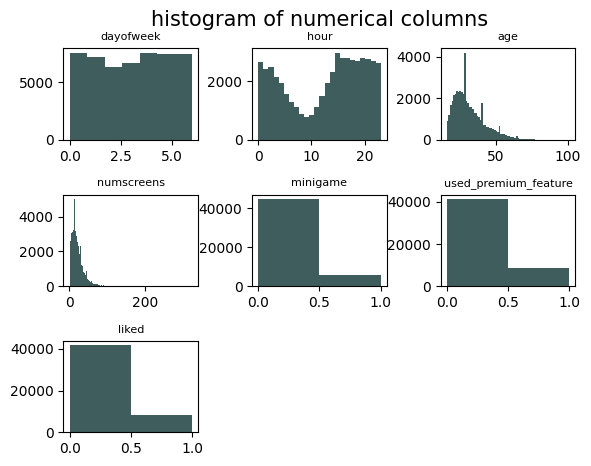

In [137]:
plt.suptitle('histogram of numerical columns', fontsize = 15)
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1], fontsize = 8)
    
    vals = np.size(dataset2.iloc[:, i-1].unique())
    
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color = '#3F5D5D' )
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.6)

# find out the relationship between the response variable and variables 

<Axes: title={'center': 'correlation with response variable'}>

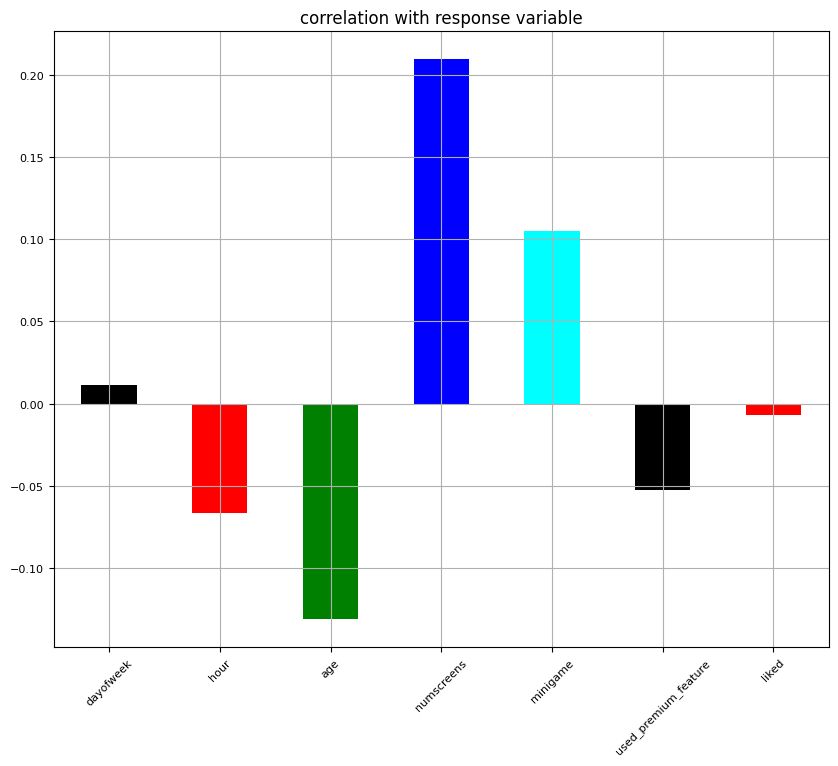

In [138]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (10,8),
                                            title = 'correlation with response variable',
                                            fontsize=8, rot=45,
                                            grid = True,
                                            color=['black', 'red', 'green', 'blue', 'cyan']
                                            )

# correlation matrix: correlation between variables

Text(0.5, 1.0, 'Heatmap using correlation matrix')

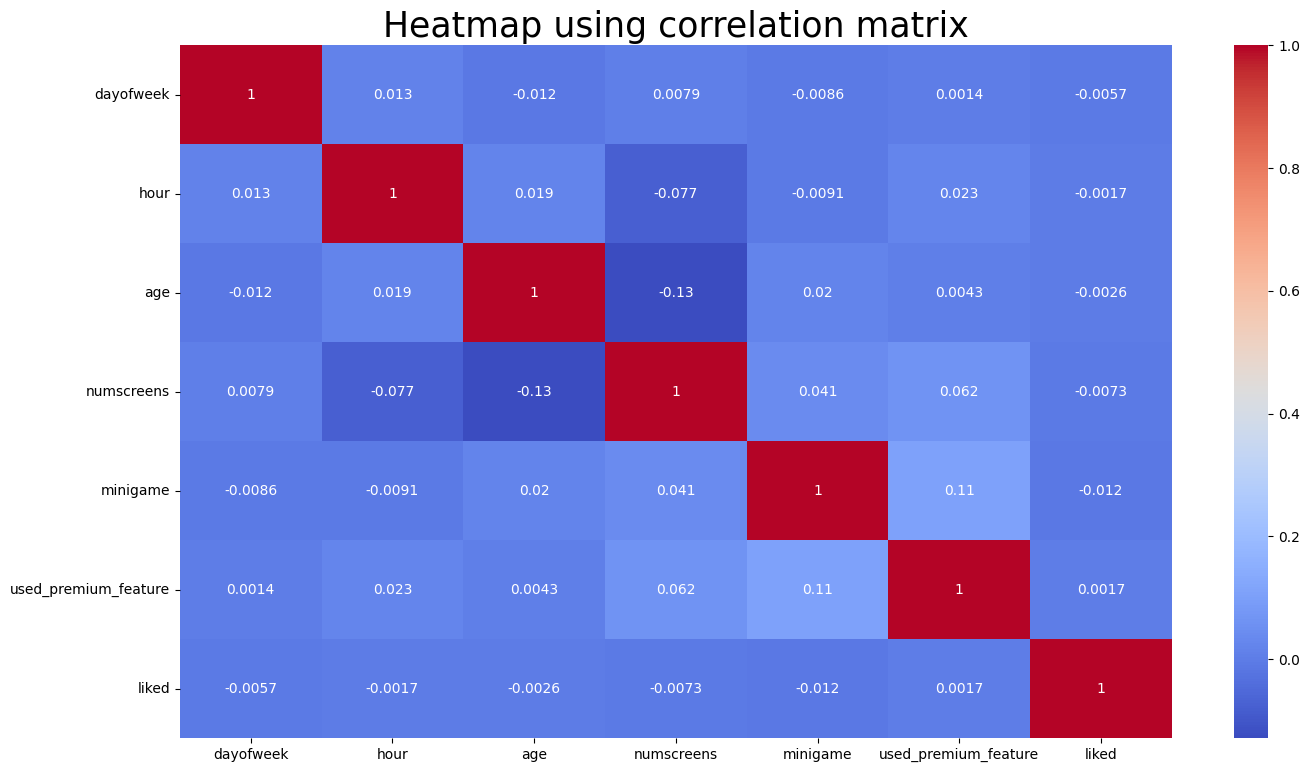

In [139]:
# Heatmap
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9
 
sns.heatmap(dataset2.corr(), annot = True, cmap ='coolwarm') # show heatmap
 
plt.title("Heatmap using correlation matrix", fontsize = 25) # title of heatmap

# feature engineering - how many people enrolled in 24 hrs

In [140]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

<h3> convert the dates to derive 24 hrs

In [141]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]

In [142]:
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

In [146]:
dataset['difference'] = (dataset['enrolled_date'] - dataset['first_open'])

In [147]:
dataset['difference']

0                          NaT
1                          NaT
2                          NaT
3       0 days 00:03:03.159000
4       0 days 00:05:49.180000
                 ...          
49995   0 days 00:01:35.004000
49996                      NaT
49997                      NaT
49998   0 days 00:02:34.421000
49999                      NaT
Name: difference, Length: 50000, dtype: timedelta64[ns]

In [148]:
dataset.dtypes

user                              int64
first_open               datetime64[ns]
dayofweek                         int64
hour                              int32
age                               int64
screen_list                      object
numscreens                        int64
minigame                          int64
used_premium_feature              int64
enrolled                          int64
enrolled_date            datetime64[ns]
liked                             int64
difference              timedelta64[ns]
dtype: object

In [149]:
dataset['days_enrolled'] = (dataset.enrolled_date - dataset.first_open).dt.days

In [150]:
dataset['calHour'] = dataset['difference'].dt.components['hours']

In [151]:
dataset.dtypes

user                              int64
first_open               datetime64[ns]
dayofweek                         int64
hour                              int32
age                               int64
screen_list                      object
numscreens                        int64
minigame                          int64
used_premium_feature              int64
enrolled                          int64
enrolled_date            datetime64[ns]
liked                             int64
difference              timedelta64[ns]
days_enrolled                   float64
calHour                         float64
dtype: object

In [152]:
dataset['hours_req_for_enrolling'] = dataset['calHour'] + (dataset['days_enrolled']*24)

In [153]:
dataset['hours_req_for_enrolling']

0        NaN
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Name: hours_req_for_enrolling, Length: 50000, dtype: float64

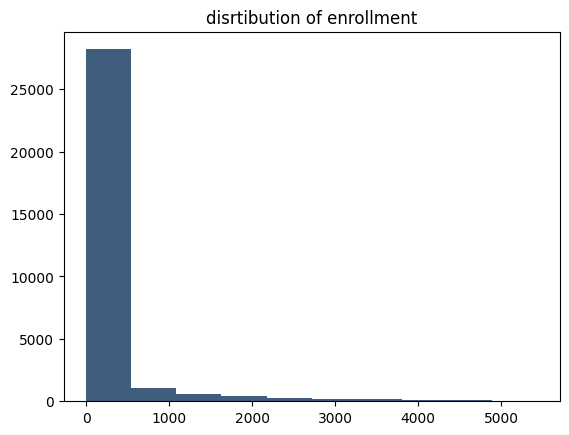

In [154]:
# check enrollment - when it happened
plt.hist(dataset['hours_req_for_enrolling'], color = '#3f5d7d')
plt.title('disrtibution of enrollment')
plt.show()

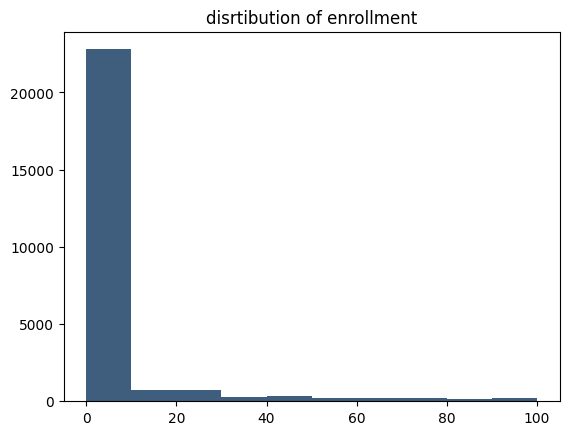

In [155]:
# IN the above graph, enrolment seem to have happened in the first 500 hours
# so lets check for 100 hours
plt.hist(dataset['hours_req_for_enrolling'], color = '#3f5d7d', range = [0, 100])
plt.title('disrtibution of enrollment')
plt.show()

In [156]:
dataset.loc[dataset.hours_req_for_enrolling > 48, 'enrolled'] = 0

In [157]:
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference,days_enrolled,calHour,hours_req_for_enrolling
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT,NaN,NaN,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT,NaN,NaN,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT,NaN,NaN,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0 days 00:03:03.159000,0.0,0.0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0 days 00:05:49.180000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0 days 00:01:35.004000,0.0,0.0,0.0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaT,NaN,NaN,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaT,NaN,NaN,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0 days 00:02:34.421000,0.0,0.0,0.0


In [158]:
dataset3 = dataset


In [159]:
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked', 'difference', 'days_enrolled', 'calHour',
       'hours_req_for_enrolling'],
      dtype='object')

In [160]:
dataset = dataset.drop(columns = ['calHour', 'days_enrolled', 'hours_req_for_enrolling', 'enrolled_date' , 'difference'])

In [161]:
# we will get the arrays of top screens from below not a df
top_screens  = pd.read_csv("D:/mallikarjuna/ML_Projects/app/top_screens.csv").top_screens.values

In [162]:
dataset['screen_list'].head()

0    idscreen,joinscreen,Cycle,product_review,ScanP...
1    joinscreen,product_review,product_review2,Scan...
2                                    Splash,Cycle,Loan
3    product_review,Home,product_review,Loan3,Finan...
4    idscreen,joinscreen,Cycle,Credit3Container,Sca...
Name: screen_list, dtype: object

In [163]:
dataset['screen_list'] = dataset.screen_list.astype(str)+','


In [164]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc). astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',', '')

In [176]:
dataset['other'] = dataset.screen_list.str.count(',')

In [177]:
#dataset = dataset.drop(columns = ['screen_list'])

In [178]:
dataset.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,saving_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,2012-12-27 02:14:51.273,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,0,5,0,0,0,1
2,254414,2013-03-19 19:19:09.157,1,19,23,,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,...,0,0,0,0,0,10,0,2,0,1
5,56480,2013-04-03 09:58:15.752,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,...,0,0,0,0,0,6,0,2,0,1
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview,",3,0,0,0,...,0,0,0,0,0,3,0,0,0,0
7,249366,2012-12-11 03:07:49.875,1,3,26,"Home,product_review,product_review2,ScanPrevie...",41,0,1,0,...,0,0,1,0,0,8,0,2,0,1
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,0,...,0,0,0,0,0,19,0,0,0,3
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,product_review,product_review,product_rev...",19,0,0,1,...,0,0,0,0,0,11,0,0,0,1


In [179]:
# take sum of all saving screen in one place
saving_screens = ['Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6', 'Saving7', 'Saving8', 'Saving9', 'Saving10' ]
dataset['saving_count'] = dataset[saving_screens].sum(axis = 1)
dataset.drop(columns = saving_screens, inplace = True)

KeyError: "None of [Index(['Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6',\n       'Saving7', 'Saving8', 'Saving9', 'Saving10'],\n      dtype='object')] are in the [columns]"

In [175]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
dataset['credit_screens_count'] = dataset[credit_screens].sum(axis = 1)
dataset.drop(columns = credit_screens, axis = 1, inplace = True)

KeyError: "None of [Index(['Credit1', 'Credit2', 'Credit3', 'Credit3Container',\n       'Credit3Dashboard'],\n      dtype='object')] are in the [columns]"

In [172]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
dataset['cc_screens_count'] = dataset[cc_screens].sum(axis = 1)
dataset.drop(columns = cc_screens, inplace = True)

In [173]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
dataset['loan_screens_count'] = dataset[loan_screens].sum(axis = 1)
dataset.drop(columns = loan_screens, inplace = True)

In [180]:
dataset


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,saving_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,2012-12-27 02:14:51.273,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,0,5,0,0,0,1
2,254414,2013-03-19 19:19:09.157,1,19,23,,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Home,ScanPreview,VerifySSN,product_review,prod...",13,0,0,1,...,0,0,0,0,0,6,0,2,0,0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Home,",4,0,1,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,...,0,0,0,0,0,6,0,0,0,0
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Home,product_review,product_review,product_rev...",26,0,0,1,...,0,0,0,0,0,13,0,0,0,0


In [181]:
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled', 'liked',
       'location', 'Institutions', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Splash', 'RewardsContainer', 'EditProfile', 'Finances',
       'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor',
       'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure',
       'ListPicker', 'other', 'saving_count', 'credit_screens_count',
       'cc_screens_count', 'loan_screens_count'],
      dtype='object')

In [185]:
dataset.drop(columns = ['screen_list'], inplace=True)

In [186]:
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked', 'location',
       'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Splash',
       'RewardsContainer', 'EditProfile', 'Finances', 'Alerts', 'Leaderboard',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'saving_count', 'credit_screens_count', 'cc_screens_count',
       'loan_screens_count'],
      dtype='object')

In [187]:
dataset.to_csv("D:/mallikarjuna/ML_Projects/app/newappdata10.csv", index = False)